### 第21章：ファイル読み込み

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/maskot1977/toydata/main/home.txt'
urllib.request.urlretrieve(url, 'home.txt') # データのダウンロード

('home.txt', <http.client.HTTPMessage at 0x107513730>)

In [2]:
col1=[]
col2=[]
col3=[]
# ファイルを開いて一行一行読み込む
for i, line in enumerate(open('home.txt')):
    c = line.strip().split("\t")
    if i > 1 :
        col1.append(int(c[0]))  
        col2.append(int(c[1]))  
        col3.append(float(c[2])) 


In [3]:
col1

[86700,
 87300,
 88200,
 170000,
 83000,
 100000,
 170000,
 105000,
 83000,
 56000,
 65000,
 56000,
 63000,
 67000,
 87000,
 85000,
 64000,
 67000,
 140000,
 113000,
 117000,
 113000,
 110000,
 114000,
 87000,
 170000,
 105000,
 78000,
 85000,
 179000,
 78000,
 179000,
 78000,
 78000,
 103000,
 105000,
 98000,
 86000,
 76000,
 83000,
 76000,
 76000,
 63000,
 63000,
 63000,
 76000,
 90000,
 91000,
 92000,
 86000,
 87000,
 90000,
 92000,
 93000,
 94000,
 97000,
 94000,
 97000,
 95000,
 130000,
 94000,
 97000,
 95000,
 97000,
 99000,
 100000,
 103000,
 99000,
 101000,
 101000,
 103000,
 102000,
 105000,
 137000,
 100000,
 79000,
 75000,
 81000,
 85000,
 80000,
 83000,
 93000,
 104000,
 183000,
 183000,
 110000,
 117000,
 99000,
 159000,
 180000,
 114000,
 74000,
 91000,
 92500,
 88000,
 88000,
 88000,
 88000,
 93000]

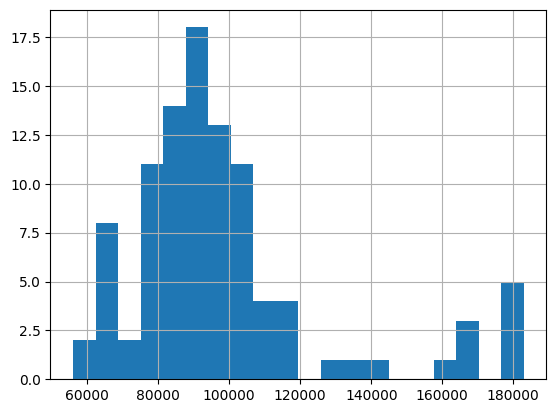

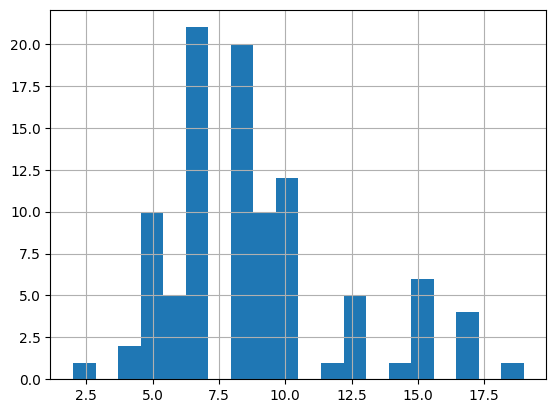

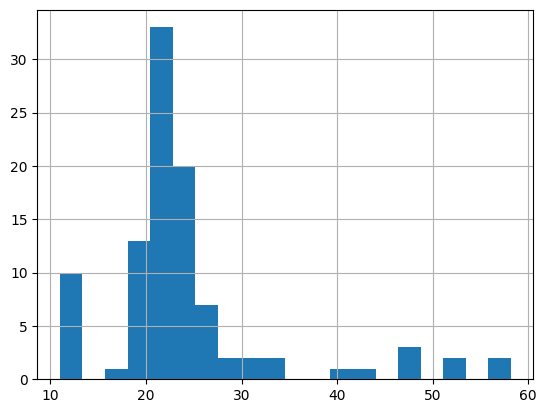

In [4]:
import matplotlib.pyplot as plt

plt.hist(col1, bins=20)
plt.grid()
plt.show()

plt.hist(col2, bins=20)
plt.grid()
plt.show()

plt.hist(col3, bins=20)
plt.grid()
plt.show()

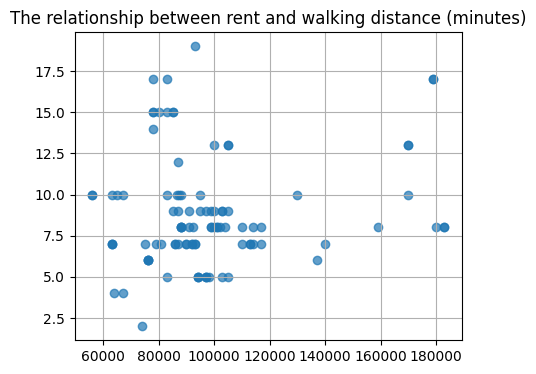

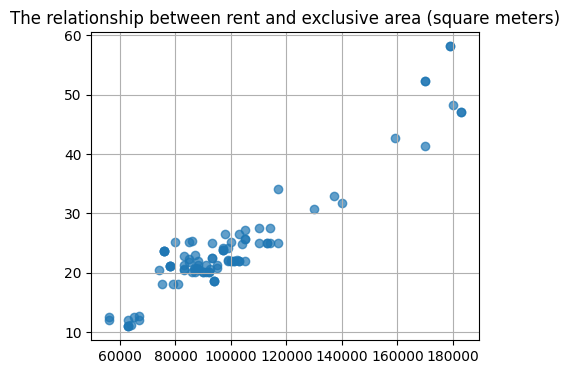

In [5]:
plt.figure(figsize=(5,4))
plt.title("The relationship between rent and walking distance (minutes)")
plt.scatter(col1, col2, alpha=0.7)
plt.grid()
plt.show()

plt.figure(figsize=(5,4))
plt.title("The relationship between rent and exclusive area (square meters)")
plt.scatter(col1, col3, alpha=0.7)
plt.grid()
plt.show()

### 第22章：平均値

In [21]:
# 平均値を求める関数を作ろう
def mean(list_):
    sum = 0
    for i in range(len(list_)):
        sum += float(list_[i])
    return sum / len(list_)

mean1 = mean(col1)
mean2 = mean(col2)
mean3 = mean(col3)

mean2


8.83838383838384

### 第23章：分散と標準偏差

In [7]:
# 分散を求める関数を作ろう
def variance(list_):
    sum = 0
    mean_value = mean(list_)
    for i in range(len(list_)):
        sum += ((list_[i]) - mean_value) ** 2
    return sum / len(list_)

var1 = variance(col1)
var2 = variance(col2)
var3 = variance(col3)


In [8]:
# 標準偏差を求める関数を作ろう
import math

def standard_deviation(list_):
    variance_value = variance(list_)
    return math.sqrt(variance_value)

std1 = standard_deviation(col1)
std2 = standard_deviation(col2)
std3 = standard_deviation(col3)


### 第24章：共分散

In [9]:
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）を作ろう
def covariance(list1, list2): 
    mean1 = mean(list1)
    mean2 = mean(list2)
    sum = 0
    for i in range(len(list1)):
        sum += (list1[i] - mean1) * (list2[i] - mean2)
    return sum / len(list1)

cov1 = covariance(col1,col2)
cov2 = covariance(col1,col3)
cov3 = covariance(col2,col3)


### 第25章：相関係数

correlation between rent and walking distance is 0.14546248271157575 , 
 correlation between rent and exclusive area is 0.9400406338076277


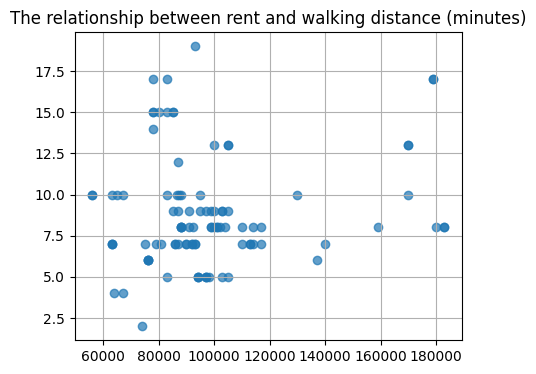

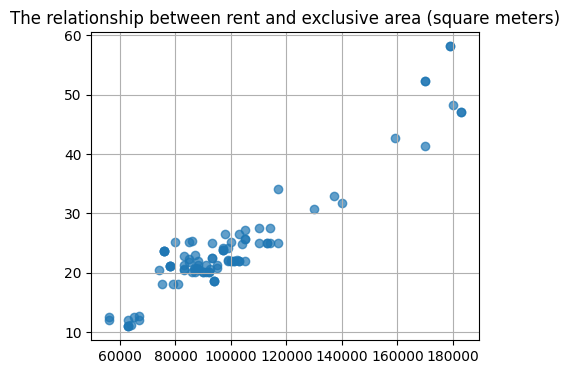

In [23]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったものを作ろう
def correlation(list1, list2):
    std1 = standard_deviation(list1)
    std2 = standard_deviation(list2)
    cov = covariance(list1,list2)
    return cov / (std1 * std2)

cor1 =correlation(col1,col2)
cor2 =correlation(col1,col3)
cor3 =correlation(col2,col3)

print(f"correlation between rent and walking distance is {cor1} , \n correlation between rent and exclusive area is {cor2}")
plt.figure(figsize=(5,4))
plt.title("The relationship between rent and walking distance (minutes)")
plt.scatter(col1, col2, alpha=0.7)
plt.grid()
plt.show()

plt.figure(figsize=(5,4))
plt.title("The relationship between rent and exclusive area (square meters)")
plt.scatter(col1, col3, alpha=0.7)
plt.grid()
plt.show()

相関係数が大きいほど、散布図の分布は線形に近づきます。

### 第26章：線形単回帰

In [38]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））を求める関数を作ろう
def a_fit(xlist, ylist):
    return (correlation(xlist,ylist) * standard_deviation(ylist)) / standard_deviation(xlist)

# y切片＝yの平均－（傾き＊xの平均）を求める関数を作ろう
def b_fit(xlist, ylist):
    return mean(ylist) - (a_fit(xlist,ylist) * mean(xlist))

X = col3
Y = col1
# 回帰直線の式を表示
print("y = f(x) = {0} x + {1}".format(a_fit(X, Y), b_fit(X, Y)))



y = f(x) = 2888.8065180384633 x + 28680.557743310186


/var/folders/tv/qptcl50j5nn7qqmd4x1xbp5r0000gn/T/ipykernel_37419/1735578514.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


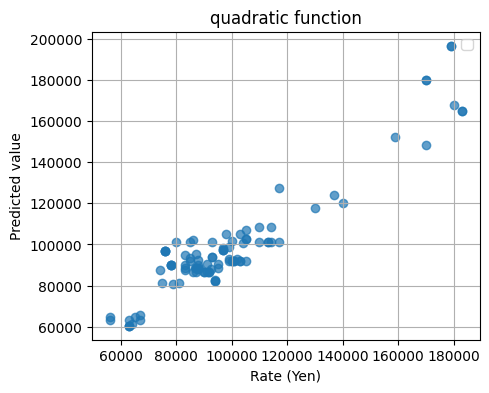

In [40]:
import numpy as np

def Regression_line (xlist, ylist):
    x_array = np.array(xlist)  # Pythonのリスト型は浮動小数点数との直接的な演算をサポートしていませんが、リストの要素ごとの操作を処理するにはNumPy配列を使用することができます。
    slope = a_fit(xlist, ylist)  
    intercept = b_fit(xlist, ylist)  
    return slope * x_array + intercept  


Y_pred = Regression_line(col3, col1)

plt.figure(figsize=(5,4))
plt.title("quadratic function")
plt.scatter(col1, Y_pred, alpha=0.7)
plt.xlabel("Rate (Yen)")
plt.ylabel("Predicted value")
plt.legend()
plt.grid()
plt.show()

In [26]:
def Mean_Absolue_Error(predlsit,observedlist):
    sum = 0
    for i in range(len(predlsit)):
        sum += abs(predlsit[i] - observedlist[i])
    return sum / len(predlsit)

MAE = Mean_Absolue_Error(Y_pred,col1)
MAE

np.float64(98599.02070707068)

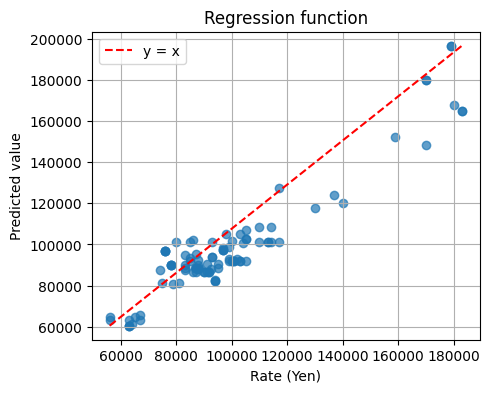

In [41]:

plt.figure(figsize=(5,4))
plt.title("Regression function")
plt.scatter(col1, Y_pred, alpha=0.7)
plt.plot([min(col1), max(col1)], [min(Y_pred), max(Y_pred)], color='red', linestyle='--', label='y = x')
plt.xlabel("Rate (Yen)")
plt.ylabel("Predicted value")
plt.legend()
plt.grid()
plt.show()

### 第27章：線形重回帰

In [28]:
# b の影響を除いた、a と y の偏回帰係数 partial regression coefficient を求める関数を作ろう
def partial_regression(B, A, Y):
    return standard_deviation(A) * (correlation(A, Y) - (correlation(B, Y) * correlation(A, B))) / (standard_deviation(A) * (1 - (correlation(A, B) ** 2)))
# 定数 w1 = （x2 の影響を除いた、x1 と y の偏回帰係数）
w1 = partial_regression(col3, col2, col1)
# 定数 w2 = （x1 の影響を除いた、x2 と y の偏回帰係数）
w2 = partial_regression(col2, col3, col1)
# 定数 t　＝　yの平均　－　w1*「x1の平均」　－　w2*「x2の平均」
t = mean(col1) - (w1 * mean(col3)) - (w2 * mean(col2))
# 回帰直線の式を表示
print("y = f(x) = {0} X1 + {1} X2 + {2}".format(w1, w2, t))

B_array = np.array(col3)
A_array = np.array(col2)
Y_array = np.array(col1)
Y_pred_2 = ( w1 * B_array ) + (w2 * A_array) + t

MAE_2 = Mean_Absolue_Error(Y_pred_2, col1)
MAE_2


y = f(x) = -0.12620227570692663 X1 + 0.9751973245398988 X2 + 98617.66871601802


np.float64(19655.890282669396)

MAEの値が前より上昇したため、このモデルの予測精度は以前よりも劣っていると言えます。

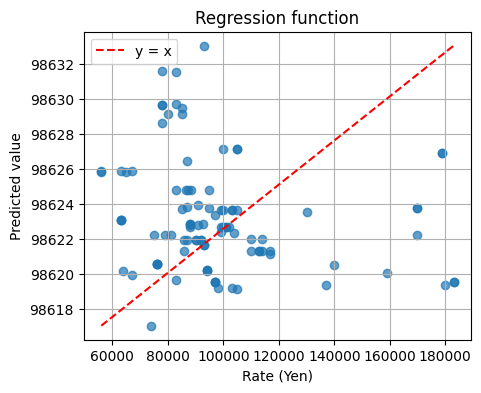

In [32]:
plt.figure(figsize=(5,4))
plt.title("Regression function")
plt.scatter(col1, Y_pred_2, alpha=0.7)
plt.plot([min(col1), max(col1)], [min(Y_pred_2), max(Y_pred_2)], color='red', linestyle='--', label='y = x')
plt.xlabel("Rate (Yen)")
plt.ylabel("Predicted value")
plt.legend()
plt.grid()
plt.show()